#### <font color="black"> <left> Fecha de Actualización:8/8/2023

# <font color="navy"> <center> Quantitative Asset Allocation

In [1]:
from functions import download_data, asset_allocation, backtesting
from visualizations import plot_backtesting

In [2]:
USA="AAPL, MSFT, NVDA, SPLG"
benchmark="^GSPC"
start_date, end_date ="2021-01-01", "2022-01-01"

In [3]:
data_opt, data_benchmark_opt = download_data(tickers_USA=USA,benchmark=benchmark, 
                                    start_date=start_date, end_date=end_date).download()

[*********************100%***********************]  4 of 4 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
data_opt

,AAPL,MSFT,NVDA,SPLG
Date,,,,
2021-01-04,2527.215960,4216.142466,2597.077881,828.236311
2021-01-05,2570.701521,4240.399361,2667.459039,837.956407
2021-01-06,2479.153817,4122.112432,2505.137431,840.862058
2021-01-07,2532.005364,4186.922409,2617.197960,842.746359
2021-01-08,2598.598702,4286.225785,2649.624956,862.899177
...,...,...,...,...
2021-12-27,3678.957279,6944.043636,6368.675225,1128.774775
2021-12-28,3671.301033,6945.363086,6263.593952,1131.748438
2021-12-29,3669.344067,6952.410659,6190.873489,1132.392480


In [5]:
data_benchmark_opt

,Adj Close
Date,
2021-01-04,3700.649902
2021-01-05,3726.860107
2021-01-06,3748.139893
2021-01-07,3803.790039
2021-01-08,3824.679932
...,...
2021-12-27,4791.189941
2021-12-28,4786.350098
2021-12-29,4793.060059


In [6]:
AA=asset_allocation(data_opt, data_benchmark_opt, .05)

In [7]:
weights_summary=AA.summary(20000)

In [8]:
weights_summary

Stocks,AAPL,MSFT,NVDA,SPLG
Min Var,0.030601,0.059975,0.009790,0.899635
Max Sharpe,0.005001,0.589826,0.382229,0.022944
Semivariance,0.034516,0.057174,0.017886,0.890425
Omega,0.007560,0.177844,0.803166,0.011430


In [9]:
start_date, end_date ="2022-01-01", "2023-12-01"

In [11]:
data_backtesting, data_benchmark_backtesting = download_data(tickers_USA=USA,benchmark=benchmark, 
                                    start_date=start_date, end_date=end_date).download()

[*********************100%***********************]  4 of 4 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [12]:
BT=backtesting(weights_summary=weights_summary, data_stocks=data_backtesting,
               data_benchmark=data_benchmark_backtesting, cap_inicial=1000000)

In [13]:
evol=BT.history
evol.tail(5)

,Min Var,Max Sharpe,Semivariance,Omega,Benchmark
Date,,,,,
2023-09-07,"830,880.3199","1,070,886.0666","835,402.9965","1,273,371.1283","928,570.5555"
2023-09-08,"832,577.1551","1,073,270.1714","836,979.9590","1,261,508.4736","929,895.2753"
2023-09-11,"836,740.2645","1,074,785.6988","841,049.7265","1,252,934.4789","936,147.3826"
2023-09-12,"818,353.3503","1,044,329.6326","822,555.6996","1,223,204.2837","930,815.1942"
2023-09-13,"814,259.0148","1,050,291.0856","818,503.8495","1,234,185.3022","933,462.4948"


In [14]:
BT.metrics(rf=0.03)

,Annualized Return,Annualized Vol,Sharpe Ratio
Min Var,-0.0955,0.2308,-0.5440
Max Sharpe,0.1084,0.3997,0.1962
Semivariance,-0.0920,0.2326,-0.5244
Omega,0.2624,0.5281,0.4402
Benchmark,-0.0199,0.2050,-0.2436


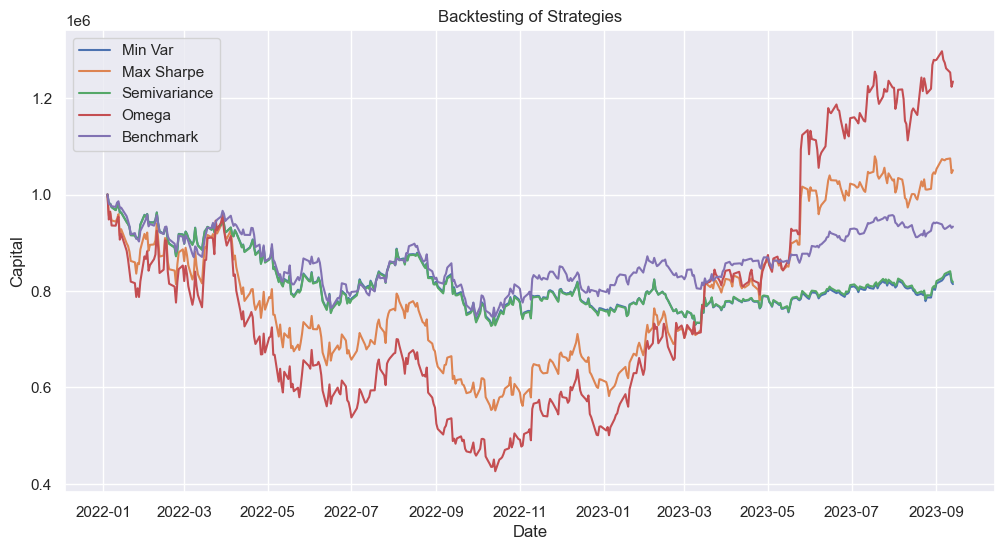

In [15]:
plot_backtesting(evol)